[![icons8-linkedin.gif](attachment:c9494563-7284-4c71-9fe4-40d31b4558ff.gif 'Author : Suryakant Kumar')](https://www.linkedin.com/in/suryakantkumar/)[![icons8-github.gif](attachment:ecd1af6f-8660-4379-b68f-bad3ed6d67c8.gif 'Author : Suryakant Kumar')](https://github.com/SuryakantKumar)
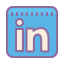
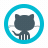

## Spark Write APIs

* All the batch write APIs are grouped under `write` which is exposed to DataFrame objects.

    * `text` - to write single column data to text files.

    * `csv` - to write to text files with delimiters. Default is a comma, but we can use other delimiters as well.

    * `json` - to write data to JSON files.

    * `orc` - to write data to ORC files.

    * `parquet` - to write data to Parquet files.

* We can also write data to other file formats by plugging in and by using `write.format`, for example **avro**

* We can use options based on the type using which we are writing the DataFrame to :

    * `compression` - Compression codec (`gzip`, `snappy` etc)

    * `sep` - to specify delimiters while writing into text files using **csv**

* We can `overwrite` the directories or `append` to existing directories using `mode`

* Create copy of orders data in **parquet** file format with no compression. If the folder already exists overwrite it. Target Location: **/user/[YOUR_USER_NAME]/retail_db/orders**

* When you pass `options`, if there are typos then options will be ignored rather than failing. Be careful and make sure that output is validated.

* By default the number of files in the output directory is equal to number of tasks that are used to process the data in the last stage. However, we might want to control number of files so that we don't run into too many small files issue.

* We can control number of files by using `coalesce`. It has to be invoked on top of DataFrame before invoking `write`.

In [1]:
val orders = spark.read
                  .schema("""order_id INT, 
                             order_date STRING, 
                             order_customer_id INT, 
                             order_status STRING""")
                  .csv("data/retail_db/orders/part-00000.csv")

Intitializing Scala interpreter ...

Spark Web UI available at http://192.168.1.138:4043
SparkContext available as 'sc' (version = 3.3.0, master = local[*], app id = local-1670450734246)
SparkSession available as 'spark'


orders: org.apache.spark.sql.DataFrame = [order_id: int, order_date: string ... 2 more fields]


In [2]:
orders.show(5, truncate=false)

+--------+---------------------+-----------------+---------------+
|order_id|order_date           |order_customer_id|order_status   |
+--------+---------------------+-----------------+---------------+
|1       |2013-07-25 00:00:00.0|11599            |CLOSED         |
|2       |2013-07-25 00:00:00.0|256              |PENDING_PAYMENT|
|3       |2013-07-25 00:00:00.0|12111            |COMPLETE       |
|4       |2013-07-25 00:00:00.0|8827             |CLOSED         |
|5       |2013-07-25 00:00:00.0|11318            |COMPLETE       |
+--------+---------------------+-----------------+---------------+
only showing top 5 rows



#### **Validate mode of compression**

In [3]:
spark.conf.get("spark.sql.parquet.compression.codec")

res1: String = snappy


### Write Data in CSV File

#### **Uncompressed File**

In [4]:
orders.write
      .mode("overwrite")
      .option("compression", "none")
      .csv("./data/write/orders")

#### **Compressed File**

In [5]:
orders.write
      .mode("append")
      .option("compression", "gzip")
      .csv("./data/write/orders")

#### **Using Format**

In [6]:
orders.write
      .mode("append")
      .option("compression", "gzip")
      .format("csv")
      .save("./data/write/orders")

### Write Data in Parquet File

#### **Uncompressed File**

In [7]:
orders.write
      .mode("append")
      .option("compression", "none")
      .parquet("./data/write/orders")

#### **Compressed File**

In [8]:
orders.write
      .mode("append")
      .option("compression", "gzip")
      .parquet("./data/write/orders")

#### **Using Format**

In [9]:
orders.write
      .mode("append")
      .option("compression", "gzip")
      .format("parquet")
      .save("./data/write/orders")

#### **Limit Number of Files using `coalesce`**

In [10]:
orders.coalesce(1)
      .write
      .mode("append")
      .option("compression", "gzip")
      .format("parquet")
      .save("./data/write/orders")